Name:- Subodh Narayan Sah
Reg:-BL.EN.U4CSE21199
Lab:-06

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
data=pd.read_csv("SolarPrediction.csv")
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 0:00,23:55:26,1.21,48,30.46,59,177.39,5.62,6:13:00,18:13:00
1,1475229023,9/29/2016 0:00,23:50:23,1.21,48,30.46,58,176.78,3.37,6:13:00,18:13:00
2,1475228726,9/29/2016 0:00,23:45:26,1.23,48,30.46,57,158.75,3.37,6:13:00,18:13:00
3,1475228421,9/29/2016 0:00,23:40:21,1.21,48,30.46,60,137.71,3.37,6:13:00,18:13:00
4,1475228124,9/29/2016 0:00,23:35:24,1.17,48,30.46,62,104.95,5.62,6:13:00,18:13:00


A1. Take any 2 features from your project having has real numeric values. Make a scatter plot of the 
data and observe the pattern

Text(0.5, 1.0, 'Scatter Plot between Temperature and Humidity')

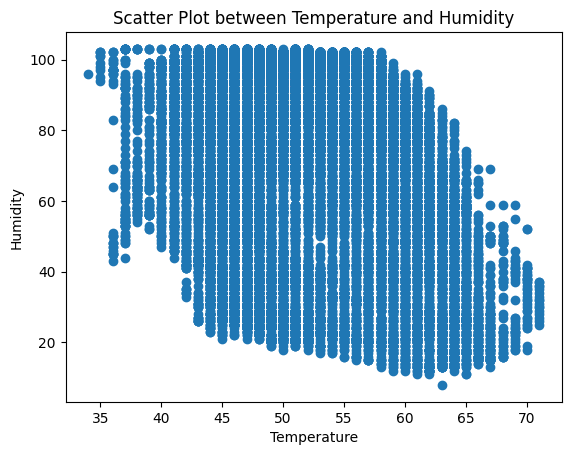

In [50]:
plt.scatter(data["Temperature"],data["Humidity"])
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.title("Scatter Plot between Temperature and Humidity")

#A2. Create a linear regression model on this data. Consider using one feature as independent variable while the other as dependent variable 
#(you may also round this number to integer). After the model is created, calculate the mean square error by predicting the values from the model. 
#Refer site: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html.


Coefficients: 
 [37.45003797]
Mean squared error: 4797.94
Coefficient of determination: -26075784.65


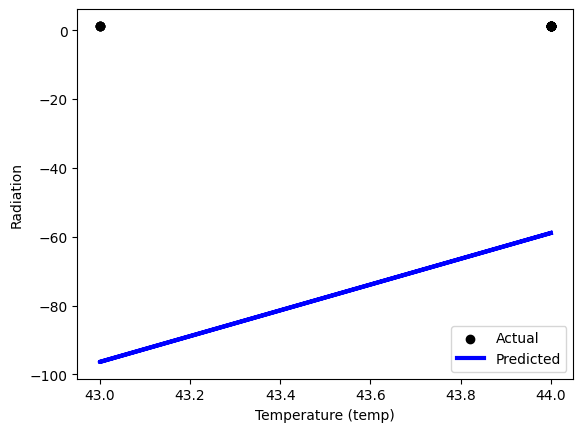

In [51]:

import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset from 'data.csv'

# Specify independent and dependent variables
X = data[['Temperature']]  # Independent variables
y = data['Radiation']  # Dependent variable

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

y_train = y[:-20]
y_test = y[-20:]

# Create a linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
# Plot outputs
plt.scatter(X_test['Temperature'], y_test, color="black", label="Actual")
plt.plot(X_test['Temperature'], y_pred, color="blue", linewidth=3, label="Predicted")
plt.legend()
plt.xlabel('Temperature (temp)')
plt.ylabel('Radiation')
plt.show()

In [52]:
#A4. Using the training set available for your project, train a logistic regression classifier. Use this classifier to evaluate your test set accuracy. 
#Study the various parameters associated with logistic regression model and the role they play in the model training.[NOTE]: For Logistic regression,
#use bi-class classification problem. If your data has multiple classes, take any two classes. If your data has value prediction problem
#(Ex: stock price or car value prediction), convert it into a bi-class classification problem and fit a logistic regressor.


In [53]:
import statistics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the threshold for binary classification
threshold = statistics.mean(data['Radiation'])

# Create a binary label based on the threshold
data['Binary_Label'] = (data['Radiation'] >= threshold).astype(int)

# Extract features and labels for the first 200 rows
feat1 = data['Humidity'].head(200).values.reshape(-1, 1)
label = data['Binary_Label'].head(200).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feat1, label, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train a logistic regression model
model = LogisticRegression(C=1.0, solver='liblinear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 80.00%
Confusion Matrix:
[[12  5]
 [ 3 20]]


In [54]:
#A5. Use a Regression Tree and k-NN Regressor for value prediction. Use the data employed for A1.

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming your dataset has features (X) and a target variable (y)
X = data[['Temperature', 'Pressure', 'Humidity']]  # Replace with your actual feature column names
y = data['Radiation']  # Replace with your actual target variable column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Tree
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)
y_tree_pred = tree_regressor.predict(X_test)

# k-NN Regressor
k = 5  # You can adjust k as needed
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)
y_knn_pred = knn_regressor.predict(X_test)

# Evaluate the models
tree_mae = mean_absolute_error(y_test, y_tree_pred)
tree_mse = mean_squared_error(y_test, y_tree_pred)
tree_r2 = r2_score(y_test, y_tree_pred)

knn_mae = mean_absolute_error(y_test, y_knn_pred)
knn_mse = mean_squared_error(y_test, y_knn_pred)
knn_r2 = r2_score(y_test, y_knn_pred)

print("Regression Tree Metrics:")
print(f"MAE: {tree_mae:.2f}")
print(f"MSE: {tree_mse:.2f}")
print(f"R-squared: {tree_r2:.2f}")

print("\nk-NN Regressor Metrics:")
print(f"MAE: {knn_mae:.2f}")
print(f"MSE: {knn_mse:.2f}")
print(f"R-squared: {knn_r2:.2f}")


Regression Tree Metrics:
MAE: 101.63
MSE: 41066.44
R-squared: 0.59

k-NN Regressor Metrics:
MAE: 108.26
MSE: 36532.67
R-squared: 0.63
